# Game price data cleaning

In [136]:
import pandas as pd
from dateutil.parser import parse
import json
from numpy import nan
import matplotlib
%pylab inline
matplotlib.style.use('ggplot')
import re
import math

Populating the interactive namespace from numpy and matplotlib


In [5]:
h = open ('samples/final_data/final_data', 'rU')
data = h.read()
data = json.loads(data)

## some basic stuff, game titles, genres, publishers

In [6]:
# all game titles
data.keys()

[u'Surgeon Simulator 2013',
 u'The Binding of Isaac: Rebirth',
 u'Alien Rage',
 u'Unmechanical',
 u'Tiny Troopers',
 u'Endless Space',
 u'Akaneiro: Demon Hunters',
 u'Mutant Mudds',
 u'Deep Black: Reloaded',
 u'The Stanley Parable',
 u'Binary Domain',
 u'WRC 4: FIA World Rally Championship',
 u'Gettysburg: Armored Warfare',
 u'Torchlight',
 u'F1 2014',
 u'F1 2013',
 u'F1 2012',
 u'F1 2011',
 u'Sleeping Dogs',
 u'Endless Legend',
 u'Diablo III',
 u'BattleBlock Theater',
 u'Gangsters',
 u'Sniper Elite',
 u'Deathtrap',
 u"Shad'O",
 u'Disney Epic Mickey 2: The Power of Two',
 u'Grow Home',
 u'Pac-Man and the Ghostly Adventures',
 u'Dark Souls',
 u"Tom Clancy's Ghost Recon: Future Soldier",
 u'Starcraft II: Heart of the Swarm',
 u'Shadow Warrior',
 u'The Wolf Among Us',
 u'Max: The Curse of Brotherhood',
 u'Apotheon',
 u"Tom Clancy's Ghost Recon",
 u'Alien Spidy',
 u'Dark Matter (2013)',
 u'The Amazing Spider-Man',
 u'Unstoppable Gorg',
 u'The Bureau: XCOM Declassified',
 u'FTL: Faster Than

In [76]:
genres_all = {}
for v in data.values():
    for g in eval(v['genre']):
        genres_all[g] = genres_all.get(g, 0)+1
# Populor genres
sorted(genres_all.items(), key=lambda d:-d[1])
            

[(u'Action', 263),
 (u'Adventure', 116),
 (u'3D', 105),
 (u'Shooter', 69),
 (u'Strategy', 63),
 (u'2D', 60),
 (u'First-Person', 55),
 (u'Platformer', 46),
 (u'Role-Playing', 45),
 (u'Team-Based', 39),
 (u'Simulation', 27),
 (u'Open-World', 26),
 (u'Real-Time', 20),
 (u'Third-Person', 20),
 (u'Driving/Racing', 18),
 (u'Puzzle', 14),
 (u'Sports', 10),
 (u'Tactical', 10),
 (u'Arcade', 9),
 (u'Turn-Based', 9),
 (u'MMO', 9),
 (u'Roguelike', 6),
 (u'Management', 6),
 (u'Survival', 6),
 (u'MOBA', 5),
 (u"Beat-'Em-Up", 5),
 (u'Miscellaneous', 5),
 (u'Fighting', 5),
 (u'Soccer', 4),
 (u'Free-to-Play', 4),
 (u'Flight', 3),
 (u"Shoot-'Em-Up", 3),
 (u'Music/Rhythm', 2),
 (u'Compilation', 2),
 (u'Fixed-Screen', 2),
 (u'Basketball', 2),
 (u'Skateboarding/Skating', 2),
 (u'Golf', 2),
 (u'Pinball', 1),
 (u'Gambling', 1),
 (u'Text-Based', 1),
 (u'On-Rails', 1),
 (u'Hidden Object', 1),
 (u'Wrestling', 1),
 (u'Party/Minigame', 1)]

In [9]:
publishers = {}
for v in data.values():
    for g in eval(v['publisher']):
        publishers[g] = publishers.get(g, 0)+1
# developers
# This could be very useful for determining whether game is indie game or major release
# which could be very useful for forecast
# TODO:
# need to conver to discrete variable like ['major_publisher', 'mid_sived', 'indie']
# can do it manually with this list: http://www.metacritic.com/feature/game-publisher-rankings-for-2014-releases
sorted(publishers.items(), key=lambda d:-d[1])

[(u'Ubisoft', 26),
 (u'Microsoft Game Studios', 21),
 (u'Square Enix', 17),
 (u'Mastertronic', 16),
 (u'Deep Silver', 16),
 (u'Electronic Arts', 14),
 (u'Spike Chunsoft', 12),
 (u'Focus Home Interactive', 12),
 (u'2K Games', 11),
 (u'CyberFront', 11),
 (u'Activision', 11),
 (u'Warner Bros. Interactive Entertainment', 10),
 (u'Kalypso', 10),
 (u'Sega', 9),
 (u'Daedalic Entertainment', 9),
 (u'Capcom', 9),
 (u'Konami', 9),
 (u'Paradox Interactive', 9),
 (u'Merge Games', 8),
 (u'Feral Interactive', 8),
 (u'Codemasters', 8),
 (u'E-Frontier', 7),
 (u'Iceberg Interactive', 7),
 (u'Devolver Digital', 7),
 (u'Namco Bandai Games', 7),
 (u'Nordic Games Publishing', 7),
 (u'Curve Studios', 6),
 (u'Bandai Namco Games', 5),
 (u'Blizzard Entertainment', 5),
 (u'Atari', 5),
 (u'Ikaron', 5),
 (u'Aspyr', 4),
 (u'Nintendo', 4),
 (u'Lace Mamba Global', 4),
 (u'Midnight City', 4),
 (u'BigBen Interactive', 4),
 (u'Zoo Corporation', 4),
 (u'Koch Media', 3),
 (u'Soedesco', 3),
 (u'Perfect World Entertainment

In [161]:
pd.DataFrame(sorted(publishers.items(), key=lambda d:-d[1])).to_csv('publishers.csv')

In [ ]:
developers = {}
for v in data.values():
    for g in eval(v['developer']):
        developers[g] = developers.get(g, 0)+1
# developers, this may be less important unless we have more metadata on the developer
# it probably has less impact on sales anyways
sorted(developers.items(), key=lambda d:-d[1])

In [7]:
game_data = data['Far Cry 4']

In [8]:
game_data.keys()

[u'',
 u'publisher',
 u'name',
 u'date_published',
 u'theme',
 u'score',
 u'systems',
 u'user_review_score',
 u'price_history',
 u'genre',
 u'developer']

## vendors

* need to filter some vendors, especially from other regions e.g. South American

In [25]:
vendors = {}
for v in data.values():
    for col in v['price_history'][0].keys():
        if col not in ('certainty', 'emphasis', 'Date', ''):
            vendors[col] = vendors.get(col, 0)+1
# Vendors by occurrance, desc

## TODO: Need to filter some vendors
## e.g. Nuuvem is Brazillian site and is always much cheaper
sorted(vendors.items(), key=lambda d:-d[1])
            

[(u'Steam', 407),
 (u'GamersGate', 256),
 (u'GreenMan Gaming', 233),
 (u'Amazon', 221),
 (u'Humble Store', 220),
 (u'GameStop PC', 199),
 (u'Nuuvem', 195),
 (u'FunStock Digital', 184),
 (u'GameFly', 179),
 (u'DLGamer', 173),
 (u'GamesPlanet UK', 164),
 (u'GamesPlanet FR', 158),
 (u'GamesPlanet DE', 152),
 (u'Gamesrocket', 140),
 (u'GamesPlanet US', 138),
 (u'Uplay PC', 132),
 (u'GetGames', 130),
 (u'Direct2Drive', 105),
 (u'Bundle Stars', 86),
 (u'GOG', 83),
 (u'Desura', 74),
 (u'Humble Widgets', 74),
 (u'Origin PC', 66),
 (u'IndieGala Store', 65),
 (u'Newegg', 57),
 (u'GamesRepublic', 55),
 (u'ShinyLoot', 23),
 (u'IndieGameStand', 16),
 (u'Gameolith', 13),
 (u'FireFlower', 11),
 (u'Square Enix', 11),
 (u'Adventure Shop', 9),
 (u'Coinplay.io', 4)]

In [104]:
# filter out some ineligible vendors
vendor_filt = [v for v in vendors 
               if v not in ('Nuuvem', 'GamesPlanet UK', 'GamesPlanet FR', 'GamesPlanet DE', '')]
vendor_filt

[u'IndieGala Store',
 u'FireFlower',
 u'IndieGameStand',
 u'GreenMan Gaming',
 u'GameStop PC',
 u'Newegg',
 u'Coinplay.io',
 u'Amazon',
 u'GamesRepublic',
 u'Bundle Stars',
 u'Desura',
 u'Uplay PC',
 u'Gamesrocket',
 u'Direct2Drive',
 u'Humble Store',
 u'Humble Widgets',
 u'GOG',
 u'GamersGate',
 u'FunStock Digital',
 u'DLGamer',
 u'Steam',
 u'Adventure Shop',
 u'Gameolith',
 u'GamesPlanet US',
 u'Square Enix',
 u'GameFly',
 u'Origin PC',
 u'GetGames',
 u'ShinyLoot']

## Clean up prices and convert to | weeks_from_release | price | pct_off | format

open issues:
- vendor filter 
- starting price (right now i use 1st price record, which maybe incorrect, e.g. preorder sales). 
- definitely need some categorization of Publishers
- need broader genres / "other" bucket 

In [27]:

def clean_price(d):
    if d== '':
        return nan
    else: return float(d)
        
def clean_up_sales_data(game):
    """
    Given a game, parse data, 
    - convert price history to | weeks_from_release | price | pct_off | format
    - along with other metadata
    - good base data for converting to discrete vars, or charting price trend
    
    """
    game_data = data[game]
    pub_date = parse(game_data['date_published']).date()
    publisher = game_data['publisher']
    score = float(game_data['score'])
    user_review_score = float(game_data['user_review_score'])
    developer = game_data['developer']
    genre = game_data['genre']
    theme = game_data['theme']
    
    print 'Processing %s, %s' % (game, str(pub_date))

    df = pd.DataFrame(game_data['price_history'])
    # clean columns, remove columns not vendor data
    ## TODO: Need to filter some vendors
    ## e.g. Nuuvem is Brazillian site and is always much cheaper
    df = df[[c for c in df.columns if c in vendor_filt + ['Date']]]
    df['Date'] = df['Date'].apply(lambda d:parse(d).date())
    for c in df.columns:
        if c == 'Date': 
            continue
        else:
            df[c] = df[c].apply(clean_price)
    # stack vendors
    df = df.set_index('Date').stack().reset_index()
    df.columns = ['date', 'vendor', 'price']
    # create a # weeks from release date field
    df['weeks_from_release']=df.date.apply(lambda d: (d-pub_date).days/7)
    
    # aggregation: for each week, return lowest price, across all vendors, all days
    agg = df.groupby('weeks_from_release').apply(lambda d:d.price.min())
    
    # Get original price, assuming first price
    # TODO: this may not be accurate, e.g. first price maybe a preorder sales?
    original_price = agg.values[0]
    
    agg = agg.reset_index()
    agg.columns = ['weeks_from_release', 'price']
    
    # add sales pct (maybe negative value is original_price is wrong)
    agg['pct_off'] = agg.price.apply(lambda d: (original_price-d)/original_price)
    
    agg['game'] = game
    agg['pub_date'] = pub_date
    agg['publisher'] =publisher
    agg['score'] = score
    agg['user_review_score'] = user_review_score
    agg['developer'] = developer
    agg['genre'] = genre
    agg['theme'] = theme
    
    # sort columns
    leading_fields = ['game', 'weeks_from_release', 'price', 'pct_off']
    agg = agg[leading_fields + [c for c in agg.columns if c not in leading_fields]]
    return agg


In [124]:
s = clean_up_sales_data('Far Cry 4')
#s = clean_up_sales_data('Alien: Isolation')
s

Processing Far Cry 4, 2014-11-17


,game,weeks_from_release,price,pct_off,pub_date,publisher,score,user_review_score,developer,genre,theme
0,Far Cry 4,-27,59.990,0.000000,2014-11-17,[u'Ubisoft'],7,7.8,[u'Ubisoft Montreal'],"[u'Adventure', u'3D', u'Survival', u'Action', ...",[u'Modern']
1,Far Cry 4,-26,59.990,0.000000,2014-11-17,[u'Ubisoft'],7,7.8,[u'Ubisoft Montreal'],"[u'Adventure', u'3D', u'Survival', u'Action', ...",[u'Modern']
2,Far Cry 4,-25,59.990,0.000000,2014-11-17,[u'Ubisoft'],7,7.8,[u'Ubisoft Montreal'],"[u'Adventure', u'3D', u'Survival', u'Action', ...",[u'Modern']
3,Far Cry 4,-24,59.990,0.000000,2014-11-17,[u'Ubisoft'],7,7.8,[u'Ubisoft Montreal'],"[u'Adventure', u'3D', u'Survival', u'Action', ...",[u'Modern']
4,Far Cry 4,-23,59.990,0.000000,2014-11-17,[u'Ubisoft'],7,7.8,[u'Ubisoft Montreal'],"[u'Adventure', u'3D', u'Survival', u'Action', ...",[u'Modern']
5,Far Cry 4,-22,59.990,0.000000,2014-11-17,[u'Ubisoft'],7,7.8,[u'Ubisoft Montreal'],"[u'Adventure', u'3D', u'Survival', u'Action', ...",[u'Modern']
6,Far Cry 4,-21,59.990,0.000000,2014-11-17,[u'Ubisoft'],7,7.8,[u'Ubisoft Montreal'],"[u'Adventure', u'3D', u'Survival', u'Action', ...",[u'Modern']
7,Far Cry 4,-20,59.990,0.000000,2014-11-17,[u'Ubisoft'],7,7.8,[u'Ubisoft Montreal'],"[u'Adventure', u'3D', u'Survival', u'Action', ...",[u'Modern']
8,Far Cry 4,-19,59.990,0.000000,2014-11-17,[u'Ubisoft'],7,7.8,[u'Ubisoft Montreal'],"[u'Adventure', u'3D', u'Survival', u'Action', ...",[u'Modern']
9,Far Cry 4,-18,59.990,0.000000,2014-11-17,[u'Ubisoft'],7,7.8,[u'Ubisoft Montreal'],"[u'Adventure', u'3D', u'Survival', u'Action', ...",[u'Modern']


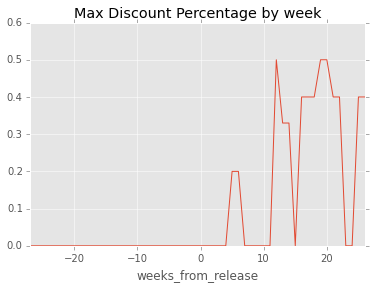

In [132]:
s.set_index('weeks_from_release').pct_off.plot(title='Max Discount Percentage by week')

Processing Alien: Isolation, 2014-10-06


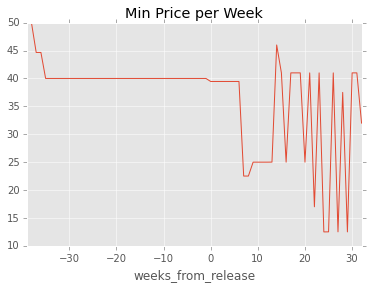

In [134]:
clean_up_sales_data('Alien: Isolation').set_index('weeks_from_release').price.plot(title='Min Price per Week')

## this has problematic starting price?

In [31]:
# Now process all the games
# This takes a while, you can use the master.csv 
pieces = []
for k,v in data.iteritems():
    #print k
    pieces.append(clean_up_sales_data(k))

Processing Surgeon Simulator 2013, 2013-04-19
Processing The Binding of Isaac: Rebirth, 2014-11-04
Processing Alien Rage, 2013-09-27
Processing Unmechanical, 2012-08-08
Processing Tiny Troopers, 2012-06-07
Processing Endless Space, 2012-07-04
Processing Akaneiro: Demon Hunters, 2013-01-24
Processing Mutant Mudds, 2012-01-26
Processing Deep Black: Reloaded, 2012-03-01
Processing The Stanley Parable, 2013-10-17
Processing Binary Domain, 2012-02-28
Processing WRC 4: FIA World Rally Championship, 2013-10-25
Processing Gettysburg: Armored Warfare, 2012-03-27
Processing Torchlight, 2009-10-27
Processing F1 2014, 2014-10-17
Processing F1 2013, 2013-10-04
Processing F1 2012, 2012-09-17
Processing F1 2011, 2011-09-19
Processing Sleeping Dogs, 2012-08-13
Processing Endless Legend, 2014-09-18
Processing Diablo III, 2012-05-15
Processing BattleBlock Theater, 2013-04-03
Processing Gangsters, 1998-11-30
Processing Sniper Elite, 2005-10-18
Processing Deathtrap, 2015-02-04
Processing Shad'O, 2012-09-0

In [33]:

master = pd.concat(pieces)
master.to_csv('master.csv')

# Now Generate Dataset with Discrete Variables

- Using list of discount tier definitions like [tier_name, start_week, end_week, discount_pct_lower_bound, discount_pct_upper_bound] --> ['dsct_1st_month_20_pct_plus' ,0, 4, 0.2, 1]
- convert each discount tier into columns of boolean var

open issues:
- too many genres
- too many publisher
- starting price
- preorders (weeks_from_release<0)

In [34]:
master = pd.read_csv('master.csv')

In [35]:
master[:5]

,Unnamed: 0,game,weeks_from_release,price,pct_off,pub_date,publisher,score,user_review_score,developer,genre,theme
0,0,Surgeon Simulator 2013,0,6.99,0.000000,2013-04-19,"[u'Bossa Studios Ltd', u'Bossa Studios', u'Mas...",8,5.9,"[u'Bossa Studios Ltd', u'Bossa Studios']",[u'Simulation'],[]
1,1,Surgeon Simulator 2013,1,9.99,-0.429185,2013-04-19,"[u'Bossa Studios Ltd', u'Bossa Studios', u'Mas...",8,5.9,"[u'Bossa Studios Ltd', u'Bossa Studios']",[u'Simulation'],[]
2,2,Surgeon Simulator 2013,2,9.99,-0.429185,2013-04-19,"[u'Bossa Studios Ltd', u'Bossa Studios', u'Mas...",8,5.9,"[u'Bossa Studios Ltd', u'Bossa Studios']",[u'Simulation'],[]
3,3,Surgeon Simulator 2013,3,9.99,-0.429185,2013-04-19,"[u'Bossa Studios Ltd', u'Bossa Studios', u'Mas...",8,5.9,"[u'Bossa Studios Ltd', u'Bossa Studios']",[u'Simulation'],[]
4,4,Surgeon Simulator 2013,4,9.99,-0.429185,2013-04-19,"[u'Bossa Studios Ltd', u'Bossa Studios', u'Mas...",8,5.9,"[u'Bossa Studios Ltd', u'Bossa Studios']",[u'Simulation'],[]


In [107]:
# define the binary target variables for sales
# def = [tier_name, start_week, end_week, discount_pct_lower_bound, discount_pct_upper_bound]
# examples below:

# programmatically generate a var for each week, +20% discount
sales_tiers = [
    ['dsct_week%d_20_pct'%i ,i, i, 0.2, 1]
    for i in range(25)
]
#print 'by_week'
#print sales_tiers

# Use monthly hard coded values for now

sales_tiers = [
    ['dsct_1st_month_20_pct_plus' ,0, 4, 0.2, 1],
    ['dsct_2nd_month_20_pct_plus' ,5, 8, 0.2, 1],
    ['dsct_3rd_month_20_pct_plus' ,9, 12, 0.2, 1],
    ['dsct_4th_month_20_pct_plus' ,13, 16, 0.2, 1],
]
#print 'now using month'
sales_tiers

[['dsct_1st_month_20_pct_plus', 0, 4, 0.2, 1],
 ['dsct_2nd_month_20_pct_plus', 5, 8, 0.2, 1],
 ['dsct_3rd_month_20_pct_plus', 9, 12, 0.2, 1],
 ['dsct_4th_month_20_pct_plus', 13, 16, 0.2, 1]]

In [64]:
#sub_df = master[master.game=='Far Cry 4']#
#sub_df[(sub_df.weeks_from_release>=0) & (sub_df.weeks_from_release<=4) & (sub_df.pct_off>=0.2)]

In [148]:
def gen_discrete_vars(sub_df):
    """
    Generate discrete vars matrix for models
    - create a column (boolean) for each sales tiers (combination of time and pct amount)
    - one column for each genre 
    - all the standard metadata columns
    """
    
    meta = sub_df.reset_index().ix[0]
    genres = eval(meta['genre']) # list of genres

    obj = {
        'pub_date':meta['pub_date'],
        'score':meta['score'],
        'user_review_score':meta['user_review_score'],
        'publisher':meta['publisher'],
        'developer':meta['developer'],
        'dsct_propensity': 0,
    }
    # create 1 col for each genre, boolean var
    # TODO: too many genres, need a broader category, or a "other" bucket
    for g in genres_all:
        has_genre = 0
        if g in genres:
            has_genre = 1
        obj['genre_'+re.sub('[^A-Za-z0-9]', '', g.lower())] = has_genre
    
    # create a col for each sales tier
    for k,row in sub_df.iterrows():
        for sales_tier in sales_tiers:
            tier_name, start_week, end_week, lower, upper = sales_tier
            is_true = obj.get(tier_name, 0)
            # if condition already satisfied (e.g. at first week)
            if is_true: 
                continue 
            if (row['weeks_from_release']>=start_week and
                row['weeks_from_release']<=end_week and
                row['pct_off']>=lower and
                row['pct_off']<=upper):
                obj[tier_name] = 1
            else:
                obj[tier_name] = 0
        
        # experimental, a score to measure the propensity of discount
        if row['weeks_from_release']>0:
            obj['dsct_propensity'] += math.fabs(row['pct_off']*1.0/row['weeks_from_release'])
    # scale by the age of the game
    obj['dsct_propensity'] = obj['dsct_propensity']/sub_df.weeks_from_release.max()
    return pd.Series(obj)     

In [147]:
dataset = master.groupby('game').apply(gen_discrete_vars)

In [149]:
# sorting the cols
genre_cols = [c for c in dataset.columns if 'genre' in c]
discount_cols = [c for c in dataset.columns if 'dsct' in c and c != 'dsct_propensity']
all_metadata =  [c for c in dataset.columns if c not in genre_cols and c not in discount_cols]
dataset = dataset[all_metadata + discount_cols + genre_cols]

In [159]:
dataset[55:75]

,developer,dsct_propensity,pub_date,publisher,score,user_review_score,dsct_1st_month_20_pct_plus,dsct_2nd_month_20_pct_plus,dsct_3rd_month_20_pct_plus,dsct_4th_month_20_pct_plus,...,genre_soccer,genre_sports,genre_strategy,genre_survival,genre_tactical,genre_teambased,genre_textbased,genre_thirdperson,genre_turnbased,genre_wrestling
game,,,,,,,,,,,,,,,,,,,,,
Cannon Brawl,[u'Turtle Sandbox LLC'],0.009780,2013-07-30,[u'Turtle Sandbox LLC'],6,6.9,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
CastleStorm,[u'Zen Studios'],0.003944,2013-05-29,"[u'Zen Studios', u'Spike Chunsoft', u'Microsof...",8,7.1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Castlevania,"[u'Novotrade', u'Konami', u'Unlimited Software...",0.000010,1987-05-25,"[u'Konami', u'Nintendo']",74,8.1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Castlevania: Lords of Shadow,[u'Mercury Steam'],0.000408,2010-10-05,[u'Konami'],7,8.3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Castlevania: Lords of Shadow 2,[u'Mercury Steam'],0.015546,2014-02-25,[u'Konami'],7,7.5,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
Chaos on Deponia,[u'Daedalic Entertainment'],0.010934,2012-11-06,"[u'Daedalic Entertainment', u'Merge Games']",75,8.1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Child of Light,[u'Ubisoft Montreal'],0.011990,2014-04-29,[u'Ubisoft'],8,8.2,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Choplifter HD,[u'InXile Entertainment'],0.025674,2012-01-10,[u'InXile Entertainment'],55,6.3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cities: Skylines,[u'Colossal Order'],0.003752,2015-03-10,"[u'Paradox Interactive', u'Ikaron']",8,8.6,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [152]:
dataset.to_csv('dataset.csv')

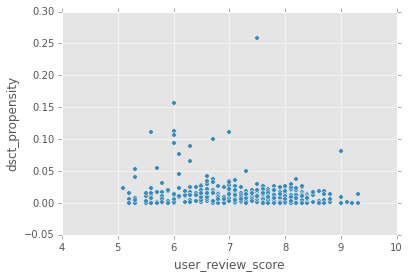

In [158]:
dataset[(dataset.dsct_propensity<10) & (dataset.user_review_score>5)].plot(kind='scatter', x='user_review_score', y='dsct_propensity')

In [154]:
dataset.score

game
1001 Spikes                                                   8
140                                                           7
7 Grand Steps                                                 7
7554                                                         35
A Bird Story                                                  8
A City Sleeps                                                 5
A Valley Without Wind                                        55
A Valley Without Wind 2                                       8
A.R.E.S. Extinction Agenda EX                                 6
AMY                                                           3
Aaru's Awakening                                              4
Action Henk                                                   7
Adventure Time: Explore the Dungeon Because I DON'T KNOW!     2
Adventure Time: The Secret of the Nameless Kingdom            6
Air Control                                                   1
...
Wargame: European Escalation   